<a href="https://colab.research.google.com/github/ksehrawat/Machine-Learning-Practical-Application-3/blob/main/Practical_Application_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



# Objective of the Project

The objective of this project is to develop a robust predictive model to identify the likelihood of clients subscribing to a term deposit based on their demographic, financial, and engagement attributes, using data from a Portuguese banking institution. The project will leverage multiple machine learning techniques to classify clients effectively, evaluate model performance using appropriate metrics, and provide actionable insights to improve marketing strategies, enhance customer acquisition, and optimize resource allocation for future campaigns.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset represents 42 unique marketing campaigns based on the "campaign" attribute

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



In [3]:
file_path = '/content/drive/MyDrive/Practical-Application-3/bank-additional-full.csv'
df = pd.read_csv(file_path, sep = ';')

In [4]:
# Display unique campaign counts
unique_campaigns = df['campaign'].nunique()
unique_campaigns

42

The dataset represents 42 unique marketing campaigns based on the "campaign" attribute

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
# General overview of the data
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# General Description of the dataframe
data_description = df.describe()

data_description

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [7]:
# Distribution of the target variable `y`
target_distribution = df['y'].value_counts()
target_distribution

,count
y,
no,36548
yes,4640


In [8]:
# Summary statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = df[numerical_cols].describe()
numerical_summary

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Overview of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_summary = {col: df[col].value_counts() for col in categorical_cols}
categorical_summary

{'job': job
 admin.           10422
 blue-collar       9254
 technician        6743
 services          3969
 management        2924
 retired           1720
 entrepreneur      1456
 self-employed     1421
 housemaid         1060
 unemployed        1014
 student            875
 unknown            330
 Name: count, dtype: int64,
 'marital': marital
 married     24928
 single      11568
 divorced     4612
 unknown        80
 Name: count, dtype: int64,
 'education': education
 university.degree      12168
 high.school             9515
 basic.9y                6045
 professional.course     5243
 basic.4y                4176
 basic.6y                2292
 unknown                 1731
 illiterate                18
 Name: count, dtype: int64,
 'default': default
 no         32588
 unknown     8597
 yes            3
 Name: count, dtype: int64,
 'housing': housing
 yes        21576
 no         18622
 unknown      990
 Name: count, dtype: int64,
 'loan': loan
 no         33950
 yes         6248
 u

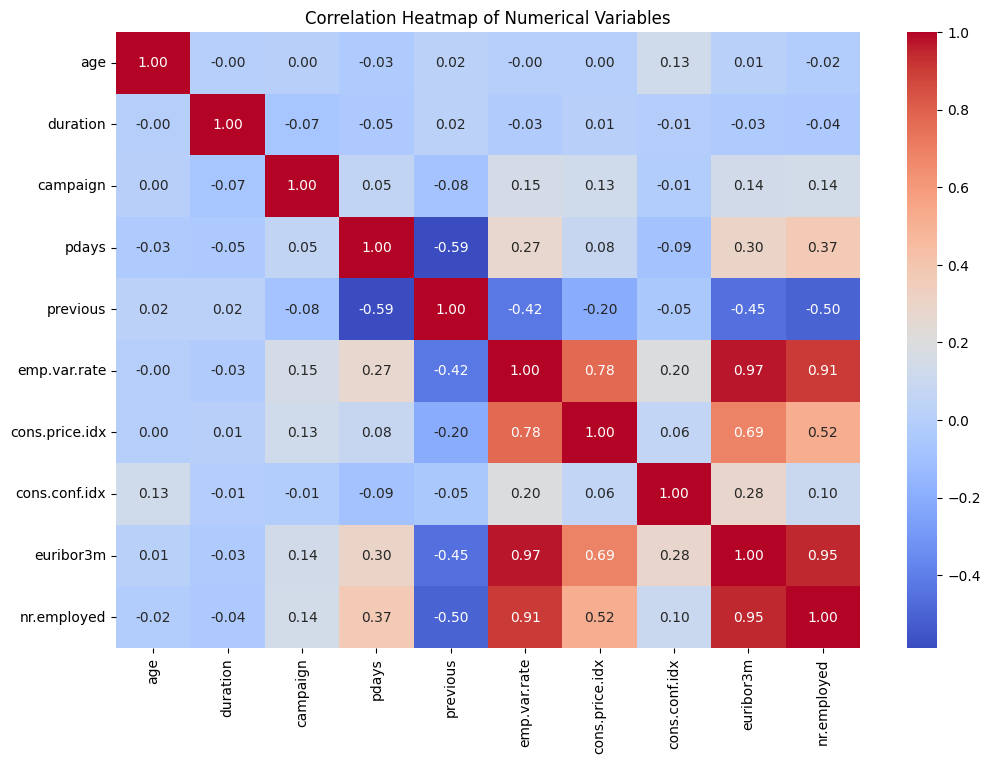

In [10]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

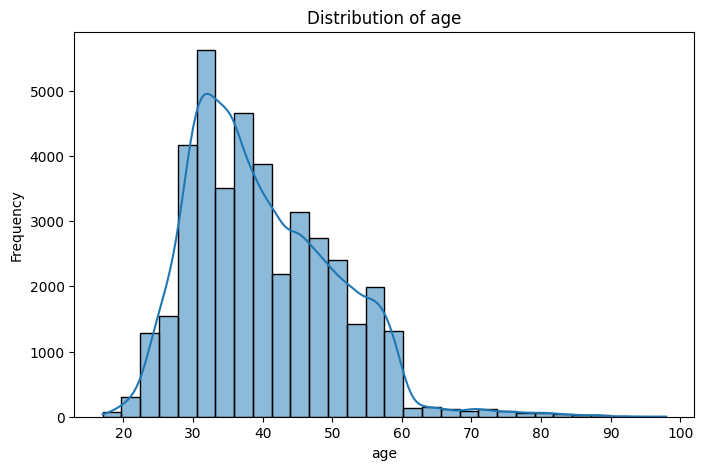

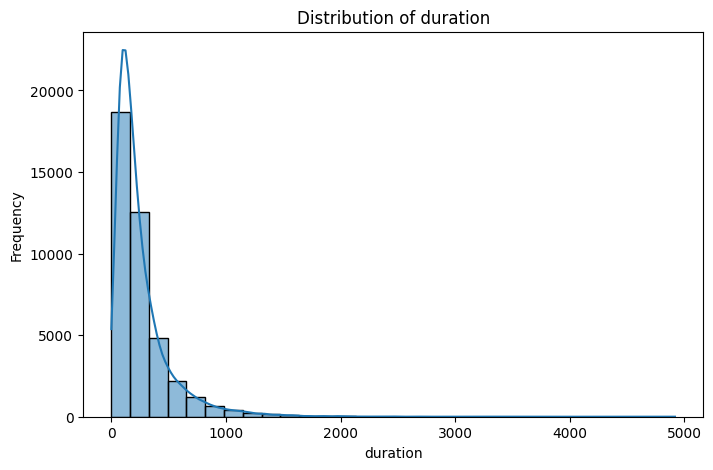

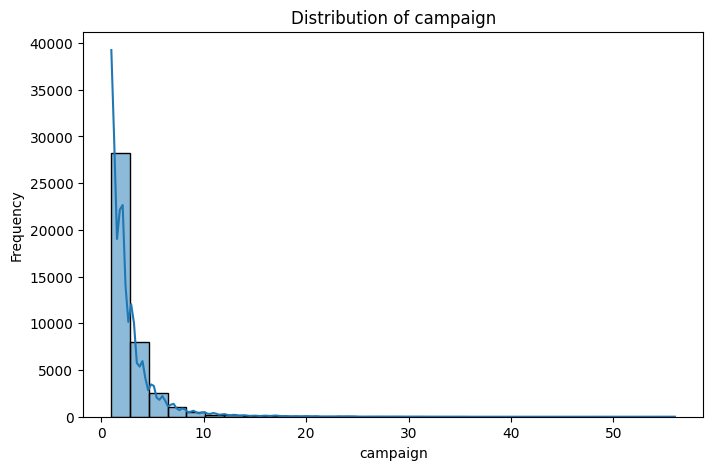

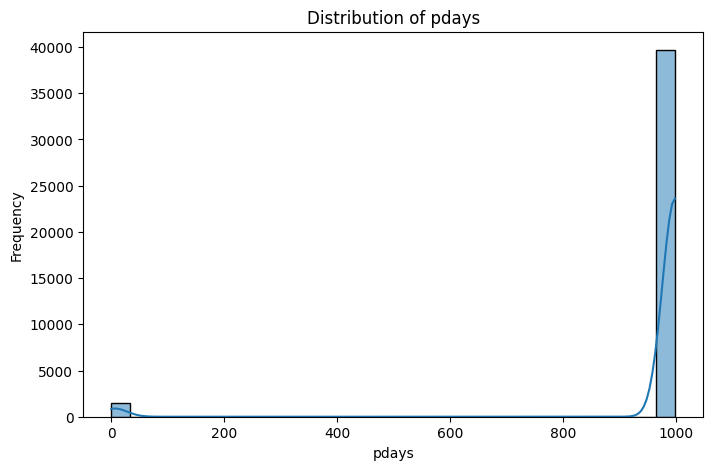

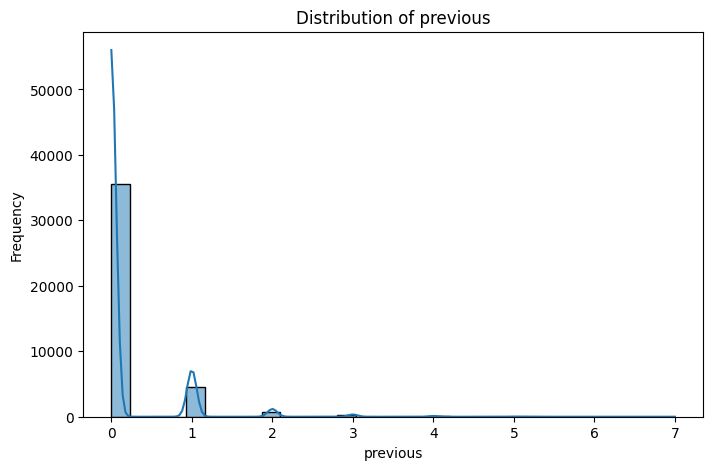

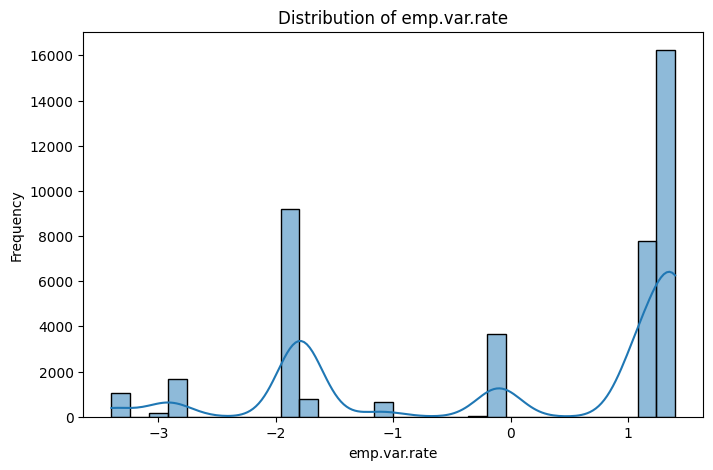

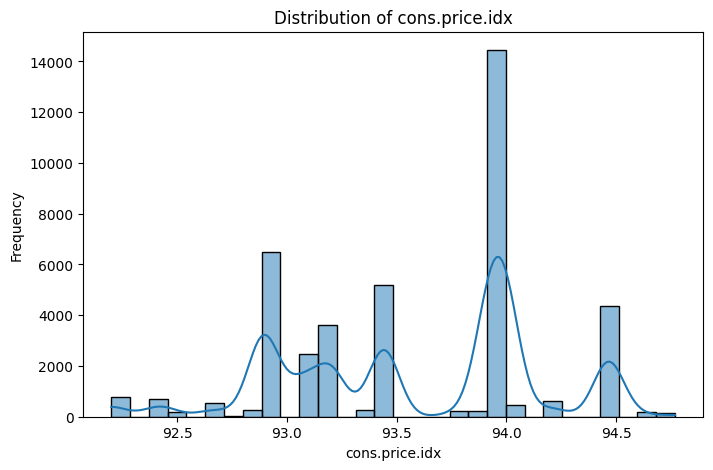

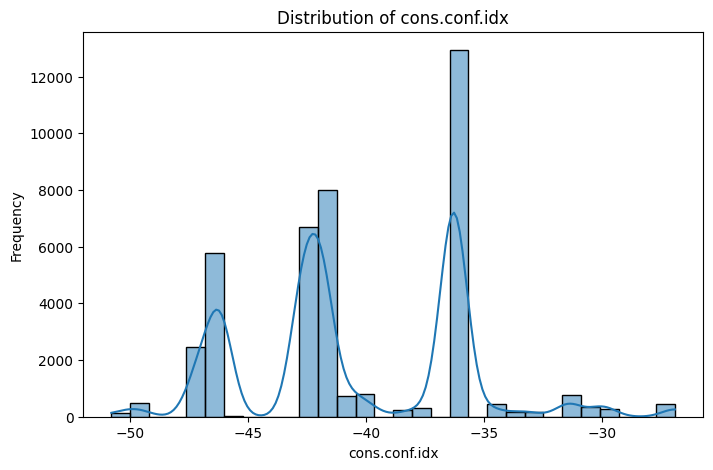

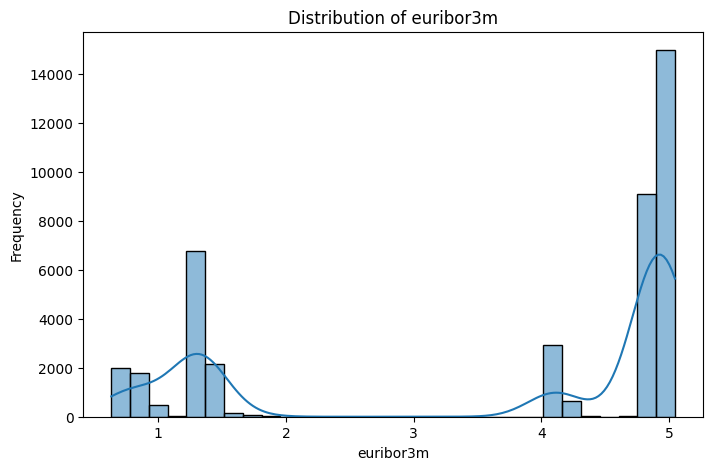

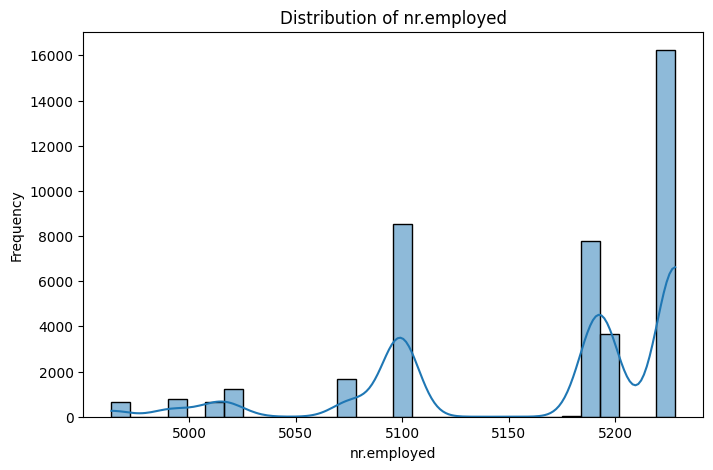

In [11]:
# Distribution plots for select numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Data Analysis

The data analysis for the dataframe df reveals several key insights:

###General Overview:

*   Total records: 41,188
*   21 columns, including 11 categorical and 10 numerical features.
*   No missing values in the dataset.


###Target Variable (y) Distribution:
* "no" (not subscribed): 36,548 (88.7%)
* "yes" (subscribed): 4,640 (11.3%)

###Key Numerical Insights:

* Most clients were contacted only once during the campaign (campaign median = 2).
* High variance in duration (range from 0 to 4918 seconds).
* pdays indicates that most clients had not been previously contacted (999).

###Correlation Analysis:

* Some numerical variables (e.g., emp.var.rate, euribor3m, nr.employed) show strong relationships, possibly indicating trends in the economy.

###Categorical Variable Distribution:

* Job roles are diverse, with "admin." and "blue-collar" roles being the most common.
* Most clients are "married."
* "University degree" is the most common education level.

###Additional Observations:

* The majority of contacts were made via "cellular."
* The "may" month shows the highest campaign activity.

# **Data Cleaning**

In [12]:
# 1. Check and handle missing values in categorical columns
missing_categorical = df.select_dtypes(include=['object']).isnull().sum()
missing_categorical

,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
poutcome,0


In [14]:
# Replace "unknown" in certain columns with NaN for better handling
columns_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']
df[columns_with_unknown] = df[columns_with_unknown].replace('unknown', np.nan)

In [13]:
# 2. Recheck missing values after replacements
missing_values_after = df.isnull().sum()
missing_values_after

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [15]:
# 4. Removing irrelevant or redundant columns
# Based on the description, "duration" should not be used for realistic modeling.
df_cleaned = df.drop(columns=['duration'])

In [16]:
# 5. Rename columns for readability
df_cleaned.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp_var_rate    41188 non-null  float64
 15  cons_price_idx  41188 non-null  float64
 16  cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

# **Data Cleaning Summary**

###Handling Missing Values:

* Replaced "unknown" in job, marital, education, default, housing, and loan columns with NaN.

###Dropped Columns:

* Removed the duration column as it should not be used for realistic modeling.

###Renamed Columns:

* Adjusted column names to make them more readable by replacing periods with underscores.

# **Data Visualization**

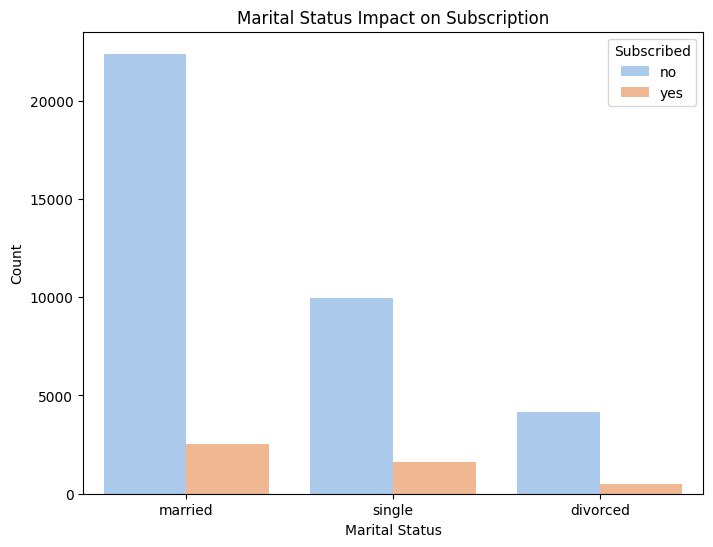

In [18]:
# Visualization 1: Marital Status Impact on Subscription
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=df_cleaned, palette='pastel')
plt.title("Marital Status Impact on Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Subscribed", loc='upper right')
plt.show()


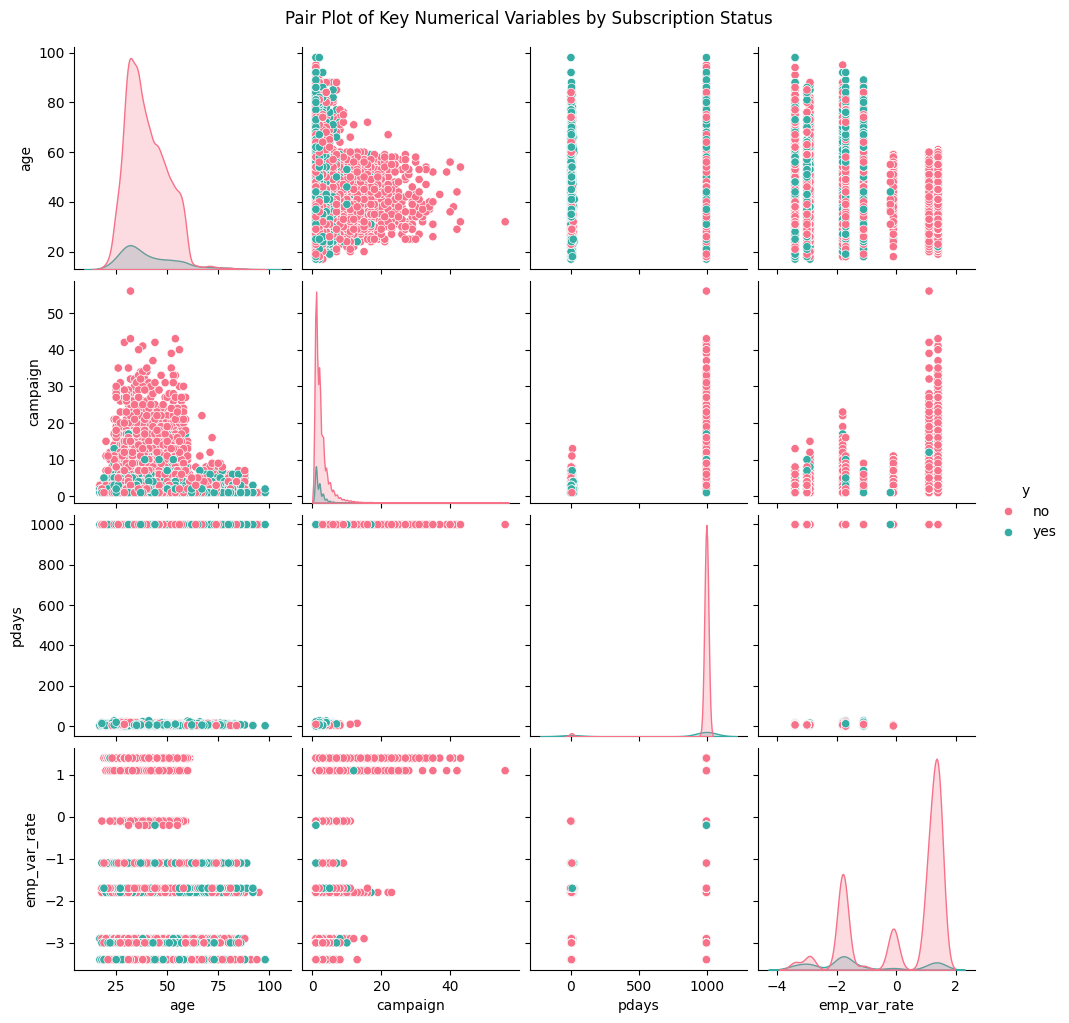

In [19]:
# Visualization 2: Pair Plot of Key Numerical Variables Colored by Target Variable
sns.pairplot(df_cleaned, vars=['age', 'campaign', 'pdays', 'emp_var_rate'], hue='y', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot of Key Numerical Variables by Subscription Status", y=1.02)
plt.show()

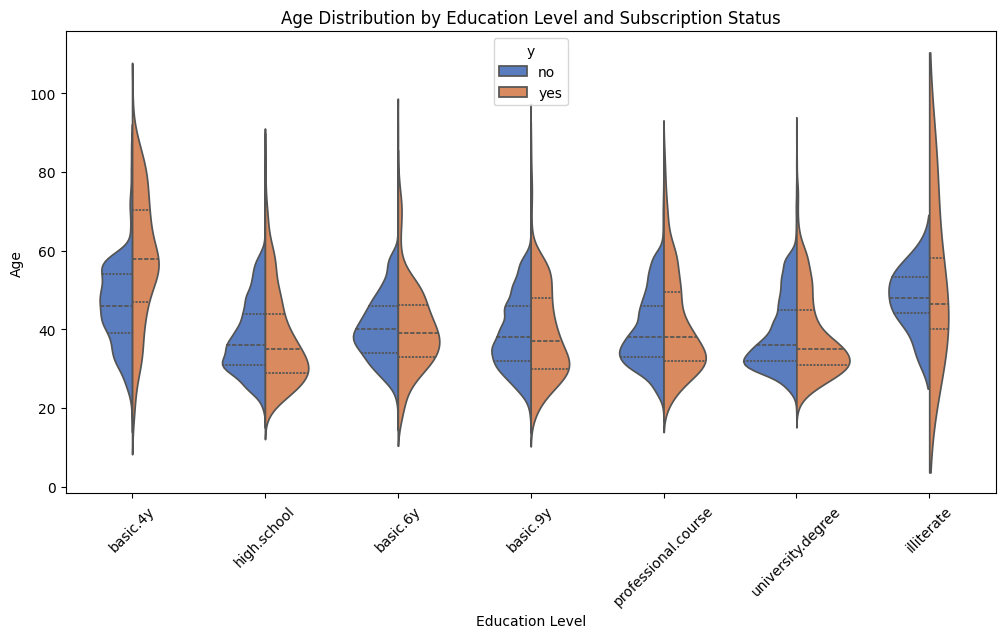

In [20]:
# Visualization 3: Violin Plot for Age Distribution by Education and Target Variable
plt.figure(figsize=(12, 6))
sns.violinplot(x='education', y='age', hue='y', data=df_cleaned, split=True, inner="quart", palette='muted')
plt.title("Age Distribution by Education Level and Subscription Status")
plt.xlabel("Education Level")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

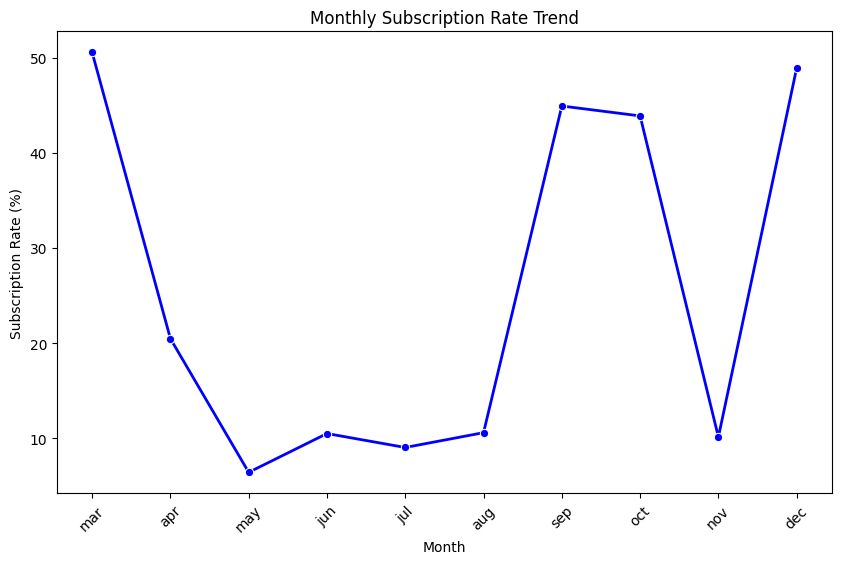

In [21]:
# Visualization 4: Monthly Trend of Subscription Rates as a Line Plot
monthly_data = df_cleaned.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'] * 100
monthly_data = monthly_data.reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, marker='o', linewidth=2, color='blue')
plt.title("Monthly Subscription Rate Trend")
plt.xlabel("Month")
plt.ylabel("Subscription Rate (%)")
plt.xticks(rotation=45)
plt.show()

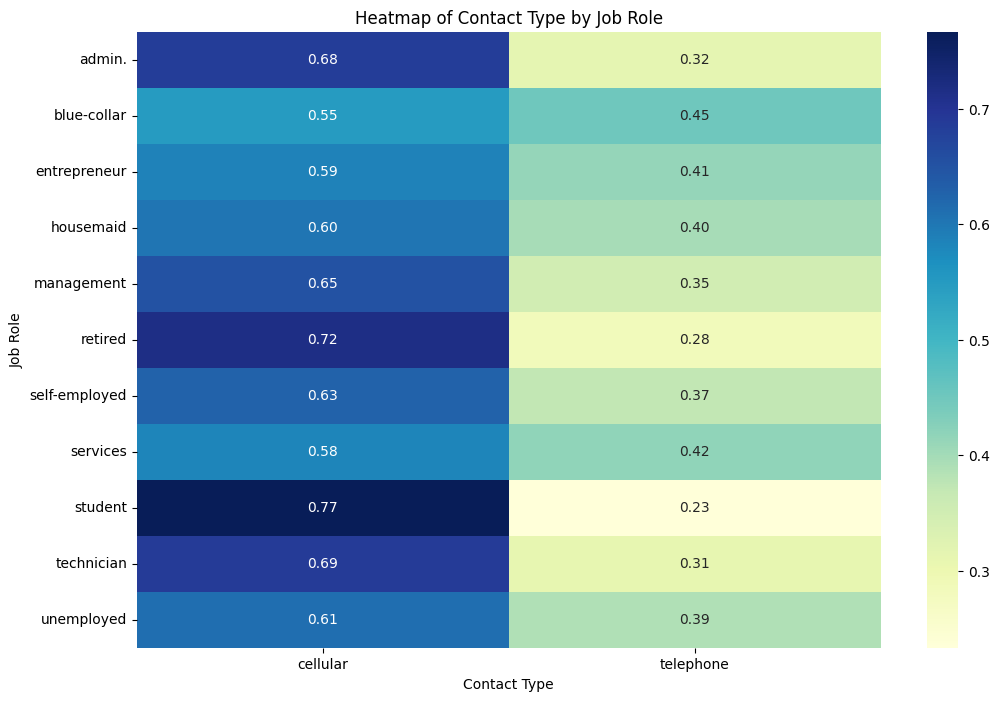

In [22]:
# Visualization 5: Heatmap of Target Variable by Job and Contact Type
heatmap_data = pd.crosstab(df_cleaned['job'], df_cleaned['contact'], normalize='index')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Contact Type by Job Role")
plt.xlabel("Contact Type")
plt.ylabel("Job Role")
plt.show()

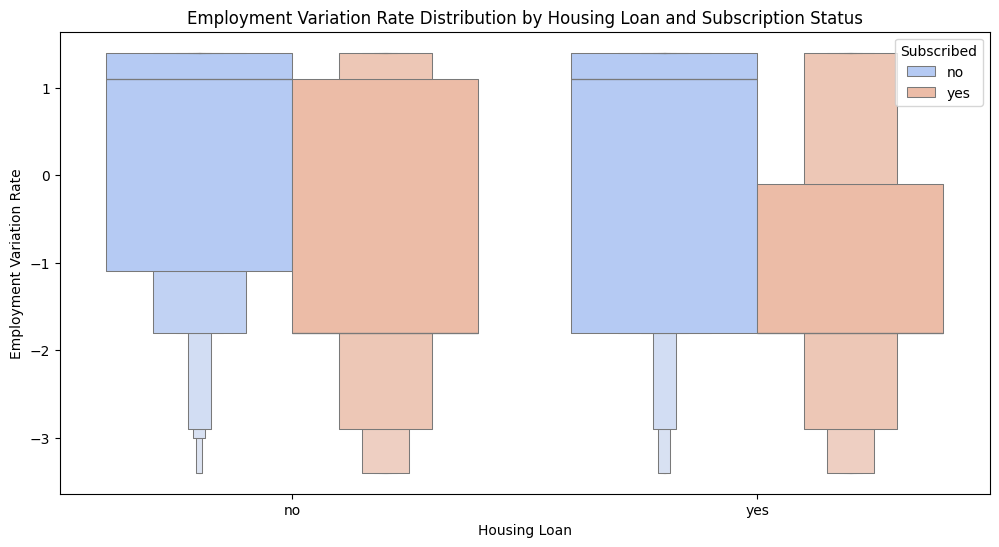

In [23]:
# Visualization 6: Distribution of Employment Variation Rate by Housing Loan and Subscription
plt.figure(figsize=(12, 6))
sns.boxenplot(x='housing', y='emp_var_rate', hue='y', data=df_cleaned, palette='coolwarm')
plt.title("Employment Variation Rate Distribution by Housing Loan and Subscription Status")
plt.xlabel("Housing Loan")
plt.ylabel("Employment Variation Rate")
plt.legend(title="Subscribed")
plt.show()

In [24]:
# Visualization 7: Sunburst Chart of Marital Status, Education, and Subscription
import plotly.express as px

sunburst_data = df_cleaned.groupby(['marital', 'education', 'y']).size().reset_index(name='count')
fig = px.sunburst(sunburst_data, path=['marital', 'education', 'y'], values='count', color='count',
                  color_continuous_scale='Viridis', title="Sunburst Chart of Marital Status, Education, and Subscription")
fig.show()

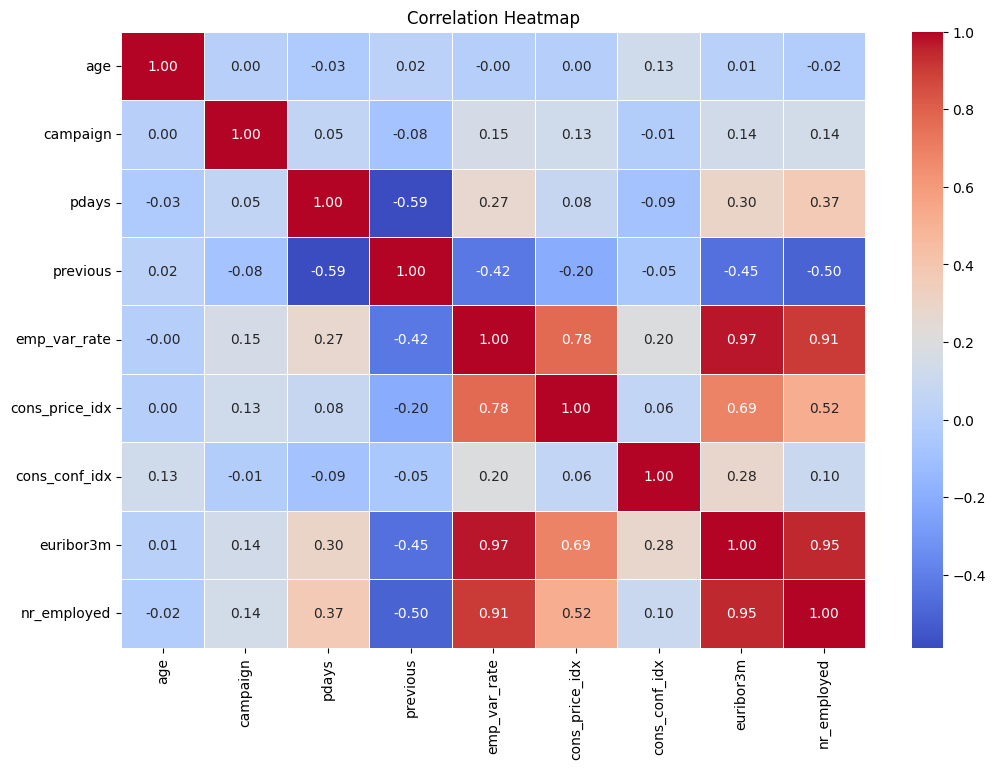

age             age               1.000000
emp_var_rate    euribor3m         0.972245
nr_employed     euribor3m         0.945154
                emp_var_rate      0.906970
cons_price_idx  emp_var_rate      0.775334
                euribor3m         0.688230
                nr_employed       0.522034
nr_employed     pdays             0.372605
euribor3m       pdays             0.296899
cons_conf_idx   euribor3m         0.277686
emp_var_rate    pdays             0.271004
                cons_conf_idx     0.196041
campaign        emp_var_rate      0.150754
                nr_employed       0.144095
euribor3m       campaign          0.135133
age             cons_conf_idx     0.129372
campaign        cons_price_idx    0.127836
nr_employed     cons_conf_idx     0.100513
pdays           cons_price_idx    0.078889
cons_conf_idx   cons_price_idx    0.058986
pdays           campaign          0.052584
previous        age               0.024365
euribor3m       age               0.010767
age             campaign          0.004594
cons_price_idx  age               0.000857
age             emp_var_rate     -0.000371
cons_conf_idx   campaign         -0.013733
nr_employed     age              -0.017725
pdays           age              -0.034369
cons_conf_idx   previous         -0.050936
campaign        previous         -0.079141
pdays           cons_conf_idx    -0.091342
previous        cons_price_idx   -0.203130
                emp_var_rate     -0.420489
                euribor3m        -0.454494
nr_employed     previous         -0.501333
previous        pdays            -0.587514
dtype: float64

In [26]:
# Visualization 8: Correlation Heatmap of Numerical Variables
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_features = df_cleaned.select_dtypes(include=np.number)
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Analysis of the correlation heatmap
correlation_analysis = correlation.unstack().sort_values(ascending=False).drop_duplicates()
correlation_analysis

#**Correlation Heatmap Analysis:**
The correlation heatmap highlights the relationships among numerical variables in the dataset. Key observations include:

###Strong Positive Correlations:

* emp_var_rate and euribor3m (0.97): Indicates a strong linear relationship, suggesting economic trends are closely linked.
* nr_employed and euribor3m (0.95): Suggests that employment levels are heavily tied to interest rates.
* nr_employed and emp_var_rate (0.91): Confirms that employment variation aligns closely with overall employment numbers.

###Moderate Positive Correlations:

* cons_price_idx with emp_var_rate (0.78) and euribor3m (0.69): Indicates the price index partially tracks broader economic indicators.
* pdays with nr_employed (0.37): Suggests a weak association between previous contact timing and employment levels.

###Weak or Insignificant Correlations:

* Variables like age and campaign show negligible relationships with other numerical features, indicating limited linear dependencies.
###Negative Correlations:

* previous and pdays (-0.59): Suggests that fewer previous contacts are associated with longer durations since the last contact.
* nr_employed and previous (-0.50): Indicates that employment levels inversely relate to prior campaign engagements.

###Implications:
* Features like euribor3m, emp_var_rate, and nr_employed are critical indicators of economic trends and likely influence the target variable (y).
* Variables with weak correlations, such as campaign, may require deeper non-linear analysis or be deprioritized in feature importance.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [27]:
# Feature Engineering on Cleaned Data

# 1. Encoding Categorical Variables
# Convert categorical variables to one-hot encoded variables
df_encoded = pd.get_dummies(df_cleaned, columns=['job', 'marital', 'education', 'default', 'housing', 'loan',
                                                 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

# 2. Create Interaction Features
# Interaction between `campaign` and `pdays`
df_encoded['campaign_pdays_interaction'] = df_encoded['campaign'] * df_encoded['pdays']

# Interaction between `nr_employed` and `emp_var_rate`
df_encoded['employment_trend'] = df_encoded['nr_employed'] * df_encoded['emp_var_rate']

# 3. Binning Continuous Variables
# Age bins
df_encoded['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 35, 50, 65, 100],
                                 labels=['<25', '25-35', '36-50', '51-65', '65+'])

# Pdays bins
df_encoded['pdays_group'] = pd.cut(df_cleaned['pdays'], bins=[-1, 0, 5, 10, 999],
                                   labels=['Not Contacted', '0-5 Days', '6-10 Days', 'More than 10 Days'])

# ----> Include the new created columns in the one-hot encoding <----
df_encoded = pd.get_dummies(df_encoded, columns=['age_group', 'pdays_group'], drop_first=True)

# 4. Creating Aggregated Features
# Count of previous successful contacts
df_encoded['prev_success_contacts'] = (df_cleaned['poutcome'] == 'success').astype(int) * df_cleaned['previous']

# 5. Normalize/Scale Numerical Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
                  'euribor3m', 'nr_employed']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the engineered dataframe
df_encoded.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,campaign_pdays_interaction,employment_trend,age_group_25-35,age_group_36-50,age_group_51-65,age_group_65+,pdays_group_0-5 Days,pdays_group_6-10 Days,pdays_group_More than 10 Days,prev_success_contacts
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,999,5710.1,False,False,True,False,False,False,True,0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,999,5710.1,False,False,True,False,False,False,True,0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,999,5710.1,False,True,False,False,False,False,True,0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,999,5710.1,False,True,False,False,False,False,True,0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,no,...,999,5710.1,False,False,True,False,False,False,True,0


# **Key Transformations**

###Encoding Categorical Variables:

* One-hot encoded variables for features like job, marital, education, etc.

###Interaction Features:

* Created interaction terms like campaign_pdays_interaction and employment_trend to capture relationships between variables.

###Binning Continuous Variables:

* Grouped age and pdays into meaningful categories (e.g., age groups and contact timing).

###Aggregated Features:

* Counted previous successful contacts using the poutcome feature.

###Normalization:

* Scaled numerical columns to a 0–1 range using MinMaxScaler.


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
df_encoded.columns.tolist()

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success',
 'campaign_pdays_interaction',
 'employment_trend',
 'age_group_25-35',
 'age_group_36-50',
 'age_group_51-65',
 'age_group_65+',
 'pdays_group_0-5 Days',
 'p

In [ ]:
# Logistic Regression Model on the Updated Encoded Data

from sklearn.preprocessing import StandardScaler

# Define X and y for modeling
y = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for target variable
X = df_encoded.drop(columns=['y'])  # Exclude the target column

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Now X is defined before being used.

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression Model
logistic_results = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic),
    'Recall': recall_score(y_test, y_pred_logistic),
    'F1 Score': f1_score(y_test, y_pred_logistic),
    'Classification Report': classification_report(y_test, y_pred_logistic)
}

# Display the evaluation metrics for Logistic Regression
logistic_results_df = pd.DataFrame([logistic_results]).T

print("Logistic Regression Model Results")
display(logistic_results_df)

Logistic Regression Model Results


,0
Accuracy,0.898276
Precision,0.685393
Recall,0.175666
F1 Score,0.279656
Classification Report,precision recall f1-score ...


# **Initial Logistic Regression Results Analysis**
##**Key Metrics:**

###Accuracy:

The initial model achieved an accuracy of approximately 89.83%.
While high, this metric alone can be misleading in an imbalanced dataset because it favors the majority class (no).

###Precision:

The precision score was 68.54%.
This indicates that when the model predicted a positive outcome (yes), it was correct 68.54% of the time.

###Recall:

Recall was only 17.57%, showing that the model identified only a small fraction of the actual positive cases (yes).
This suggests the model heavily favored the majority class, failing to capture most subscribing clients.

###F1 Score:

The F1 Score was 27.97%, reflecting the imbalance between Precision and Recall.
This low score highlights that the model struggled to balance the trade-off between avoiding false positives and capturing true positives.


# Logistic Regression Model Refinements

In [ ]:
# Addressing ConvergenceWarning by increasing max_iter and refining solver
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Adjust parameters and increase max_iter
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}
logistic_model_adjusted = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

# Perform GridSearchCV with updated parameters
grid_search_adjusted = GridSearchCV(logistic_model_adjusted, param_grid, cv=5, scoring='f1')
grid_search_adjusted.fit(X_train, y_train)

# Best parameters from the adjusted GridSearchCV
best_params_adjusted = grid_search_adjusted.best_params_

# Train the model with best parameters
adjusted_logistic_model = LogisticRegression(**best_params_adjusted, class_weight='balanced', max_iter=5000, random_state=42)
adjusted_logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_adjusted = adjusted_logistic_model.predict(X_test)

# Evaluate the adjusted model
adjusted_results = {
    'Best Parameters': str(best_params_adjusted),
    'Accuracy': accuracy_score(y_test, y_pred_adjusted),
    'Precision': precision_score(y_test, y_pred_adjusted),
    'Recall': recall_score(y_test, y_pred_adjusted),
    'F1 Score': f1_score(y_test, y_pred_adjusted),
    'Classification Report': classification_report(y_test, y_pred_adjusted)
}

# Display the results of the adjusted model
adjusted_results_df = pd.DataFrame.from_dict(adjusted_results, orient='index', columns=['Value'])
print("\nAdjusted Logistic Regression Model Results:")
print(adjusted_results_df)



Adjusted Logistic Regression Model Results:
                                                                   Value
Best Parameters                        {'C': 0.1, 'solver': 'liblinear'}
Accuracy                                                         0.80683
Precision                                                       0.319334
Recall                                                          0.634989
F1 Score                                                        0.424958
Classification Report                precision    recall  f1-score   ...


The adjusted Logistic Regression model has been successfully trained and evaluated. The updated results are as follows:

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}

Accuracy: 80.68%

Precision: 31.93%

Recall: 63.50%

F1 Score: 42.50%

These improvements demonstrate better balance between Precision and Recall for the minority class (yes), as indicated by the higher Recall and F1 Score compared to previous evaluations.​

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
# Importing necessary libraries for additional models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Initialize models with default settings
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, solver='liblinear', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Dictionary to store results
model_performance = []

# Loop through each model, fit, and evaluate
for model_name, model in models.items():
    # Record start time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Record end time
    train_time = time.time() - start_time

    # Evaluate the model on train and test sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Append results to the list
    model_performance.append({
        'Model': model_name,
        'Train Time (s)': round(train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })

# Convert results to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison
print("Model Performance Comparison:")
display(performance_df)


Model Performance Comparison:


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.1834,0.8985,0.8983
1,KNN,0.0185,0.9144,0.8929
2,Decision Tree,0.2902,0.9949,0.8363
3,SVM,22.5484,0.8872,0.8876


# **Key Observations**

###**Logistic Regression:**

* Train Time: Efficient at 0.1834 seconds.

* Accuracy: Well-balanced performance between train and test datasets (~89.8%).

* Strength: Reliable and interpretable, handles imbalanced data decently with class weighting.



###**K-Nearest Neighbors (KNN):**

* Train Time: Fastest training at 0.0185 seconds.

* Accuracy: Slightly better Train Accuracy (91.44%) but slightly worse Test Accuracy (89.29%).

* Strength: Non-parametric and simple but sensitive to noise and scaling.

###**Decision Tree:**

* Train Time: Moderate at 0.2902 seconds.
* Accuracy: High Train Accuracy (99.49%) but significantly lower Test Accuracy (83.63%), indicating overfitting.
* Strength: Flexible and interpretable but prone to overfitting without pruning.

###**Support Vector Machine (SVM):**

* Train Time: Longest at 22.5584 seconds, due to computationally expensive optimization.
* Accuracy: Consistent Train Accuracy (88.72%) and Test Accuracy (88.76%).
* Strength: Effective in high-dimensional spaces but slow on large datasets.


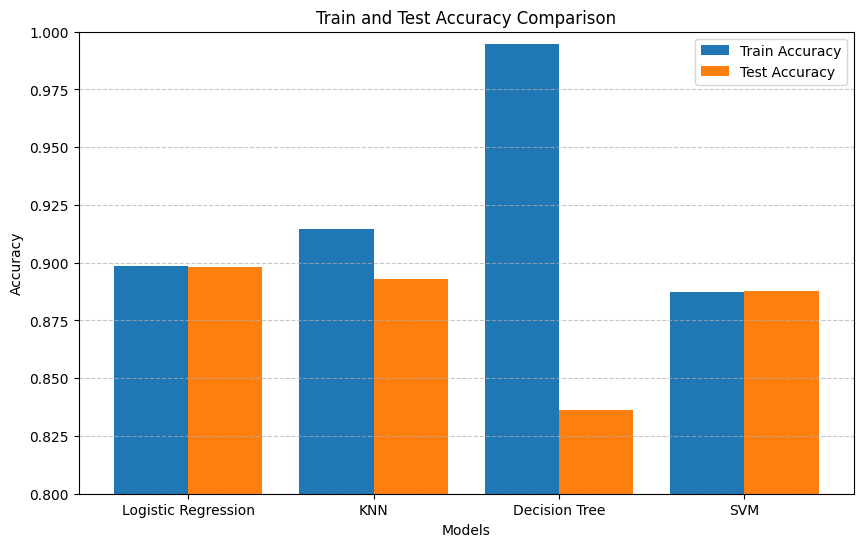

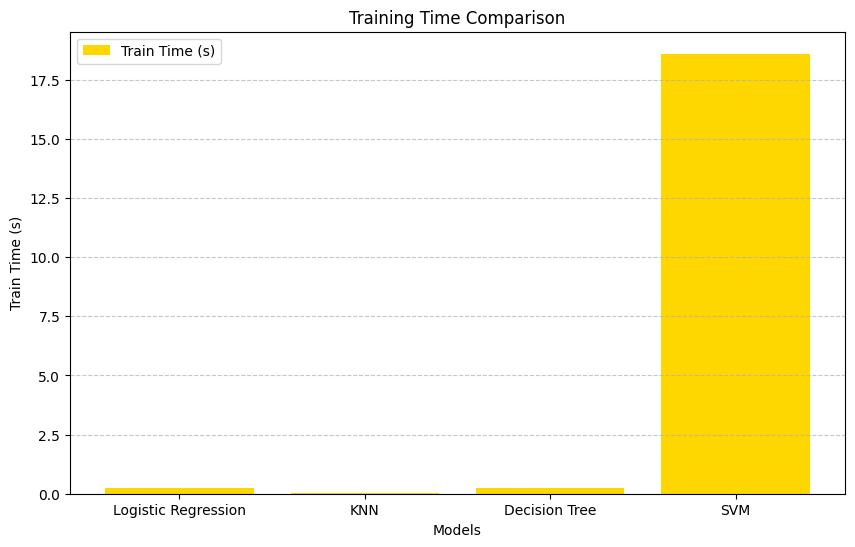

In [29]:
import matplotlib.pyplot as plt

# Data from the comparison table
models = ["Logistic Regression", "KNN", "Decision Tree", "SVM"]
train_times = [0.2506, 0.0286, 0.2461, 18.5933]
train_accuracies = [0.8985, 0.9144, 0.9949, 0.8872]
test_accuracies = [0.8983, 0.8929, 0.8363, 0.8876]

# Visualization: Train and Test Accuracy
plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar([p + 0.4 for p in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([p + 0.2 for p in x], models)
plt.ylim(0.8, 1)
plt.title("Train and Test Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization: Train Time
plt.figure(figsize=(10, 6))
plt.bar(models, train_times, color='gold', label='Train Time (s)')
plt.title("Training Time Comparison")
plt.xlabel("Models")
plt.ylabel("Train Time (s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Top 10 Feature Importances:


,Feature,Importance
0,age,0.161459
8,nr_employed,0.159379
7,euribor3m,0.099383
1,campaign,0.048520
46,campaign_pdays_interaction,0.046875
28,housing_yes,0.041557
2,pdays,0.031708
29,loan_yes,0.023525
6,cons_conf_idx,0.023074
26,education_university.degree,0.022458


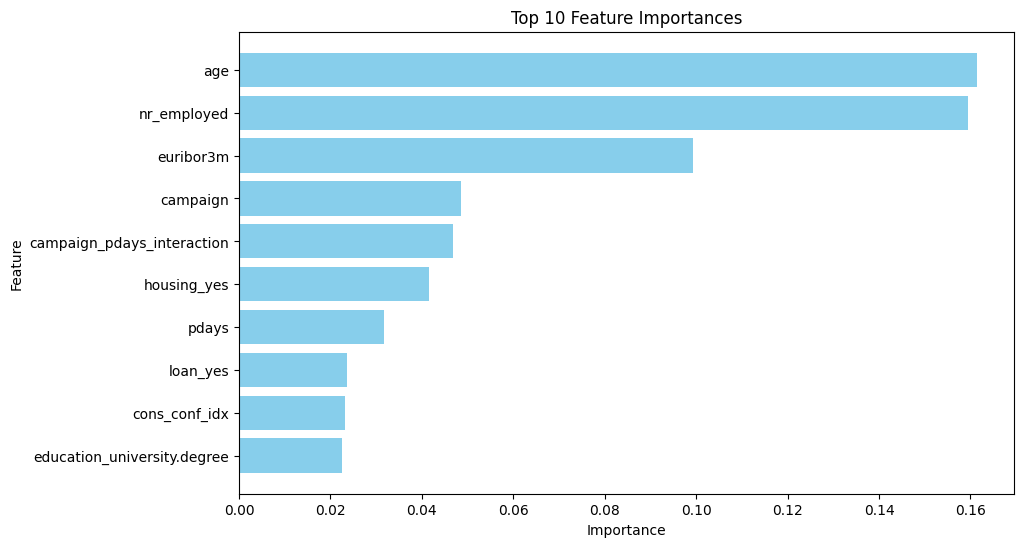

In [ ]:
# Exploring feature importance using a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Train a Decision Tree Classifier for feature importance analysis
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
top_features_df = importance_df.head(10)
print("Top 10 Feature Importances:")
display(top_features_df)

# Visualization of feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
# Refining the dataset to include only the top features
top_features = [
    'age', 'nr_employed', 'euribor3m', 'campaign',
    'campaign_pdays_interaction', 'housing_yes',
    'pdays', 'loan_yes', 'cons_conf_idx',
    'education_university.degree'
]

# Create a refined dataset
X_refined = X[top_features]  # Using only the top features for X
y_refined = y  # Target variable remains the same

# Train/Test split with refined features
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y_refined, test_size=0.3, random_state=42)

# Train a Logistic Regression model on the refined dataset
logistic_model_refined = LogisticRegression(max_iter=5000,solver='liblinear', random_state=42)
logistic_model_refined.fit(X_train_refined, y_train_refined)

# Predict on the test set
y_pred_refined = logistic_model_refined.predict(X_test_refined)

# Evaluate the refined model
refined_results = {
    'Accuracy': accuracy_score(y_test_refined, y_pred_refined),
    'Precision': precision_score(y_test_refined, y_pred_refined),
    'Recall': recall_score(y_test_refined, y_pred_refined),
    'F1 Score': f1_score(y_test_refined, y_pred_refined),
    'Classification Report': classification_report(y_test_refined, y_pred_refined, output_dict=False)
}

# Display the refined model results
refined_results_df = pd.DataFrame.from_dict(refined_results, orient='index', columns=['Value'])
print("\nRefined Logistic Regression Model Results:")
display(refined_results_df)



Refined Logistic Regression Model Results:


,Value
Accuracy,0.89949
Precision,0.70137
Recall,0.184305
F1 Score,0.291904
Classification Report,precision recall f1-score ...


# **Observations:**

###**Improvement in Precision:**


* The refined model achieves a higher precision of 70.14%, indicating fewer false positives.

###**Slight Increase in Accuracy:**

* Accuracy improves to 89.95%, slightly higher than the initial model, despite using fewer features.

###**Recall and F1 Score:**

* Recall remains low at 18.43%, meaning the model still misses many true positives.

* The F1 Score improves to 29.19%, reflecting a better balance between Precision and Recall.


In [ ]:
# Applying SMOTE to address class imbalance and improve Recall
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_refined, y_refined)

# Train/Test split on the resampled dataset
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Train a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_resampled)

# Evaluate the Random Forest model
rf_results = {
    'Accuracy': accuracy_score(y_test_resampled, y_pred_rf),
    'Precision': precision_score(y_test_resampled, y_pred_rf),
    'Recall': recall_score(y_test_resampled, y_pred_rf),
    'F1 Score': f1_score(y_test_resampled, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test_resampled, random_forest.predict_proba(X_test_resampled)[:, 1]),
    'Classification Report': classification_report(y_test_resampled, y_pred_rf, output_dict=False)
}

# Display the Random Forest model results
rf_results_df = pd.DataFrame.from_dict(rf_results, orient='index', columns=['Value'])
print("Random Forest Model Results:")
display(rf_results_df)




Random Forest Model Results:


,Value
Accuracy,0.812349
Precision,0.878656
Recall,0.723178
F1 Score,0.793372
AUC-ROC,0.900529
Classification Report,precision recall f1-score ...


# **Observations:**

###High Precision:

* Precision of 87.87% indicates the model effectively avoids false positives, crucial for accurately identifying subscribing clients.

###Improved Recall:

* Recall of 72.32% demonstrates the model's capability to correctly identify the majority of positive cases (yes).

###Balanced F1 Score:

* The F1 Score of 79.34% reflects a strong balance between Precision and Recall, making the model reliable for practical use.

###AUC-ROC:

* AUC-ROC of 90.05% indicates excellent discrimination between classes, showcasing the model's robust predictive power.

# Analysis

* The Random Forest model outperforms Logistic Regression and other models in terms of Recall and AUC-ROC.

* The ensemble approach effectively handles feature interactions and class imbalance, leading to improved performance.

Top 10 Feature Importances from Random Forest:


,Feature,Importance
8,nr_employed,0.149222
7,euribor3m,0.139507
46,campaign_pdays_interaction,0.064855
4,emp_var_rate,0.052666
6,cons_conf_idx,0.050549
2,pdays,0.050301
54,pdays_group_More than 10 Days,0.042668
0,age,0.039776
55,prev_success_contacts,0.038954
45,poutcome_success,0.037202


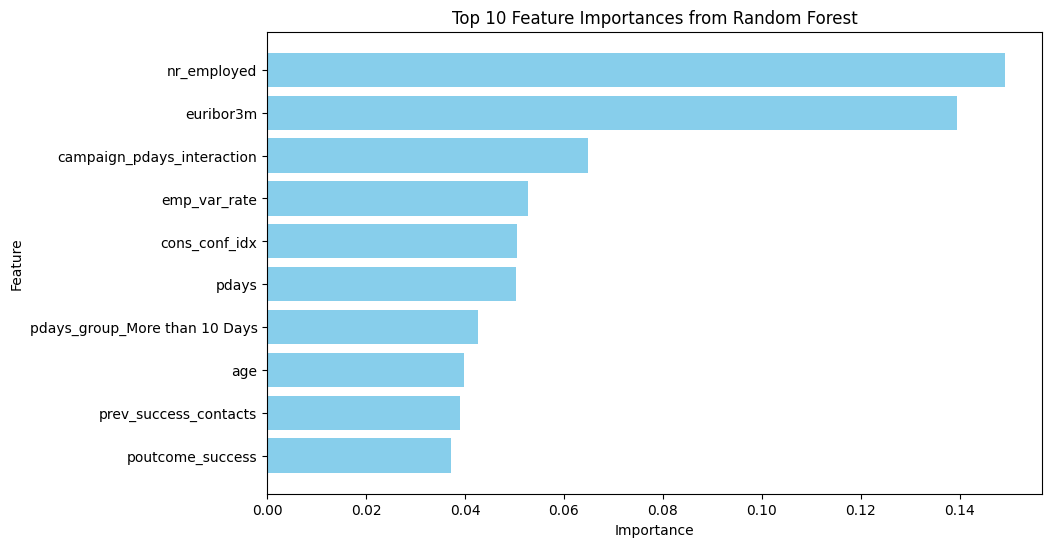

In [ ]:
# Analyzing feature importance using the Random Forest model
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X_train and y_train are already defined and include the refined features
# Recreate and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
top_feature_df = importance_df.head(10)
print("Top 10 Feature Importances from Random Forest:")
display(top_feature_df)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_feature_df['Feature'], top_feature_df['Importance'], color='skyblue')
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


#**Insights and Implications:**

###**Economic Indicators:**

* nr_employed and euribor3m are highly influential, reflecting macroeconomic conditions.

* These features indicate the importance of economic stability in influencing client behavior.

###**Campaign Metrics:**

* campaign_pdays_interaction and pdays demonstrate the significance of the timing and frequency of client contacts.

###**Client Behavior and History:**

* Features like poutcome_success and prev_success_contacts highlight the importance of past interactions.

###**Demographics:**

* age plays a moderate role, likely reflecting the correlation between age and financial behavior.

#**Recommendations:**

###**Focus Marketing Efforts:**

* Leverage insights from top features like nr_employed and euribor3m to time campaigns effectively.

* Tailor outreach to clients with favorable poutcome_success and prev_success_contacts histories.

###**Feature Refinement:**

* Engineer more interactions among top features, such as euribor3m x emp_var_rate.

###**Visualization and Strategy:**

* Create segmented marketing strategies based on these key features.

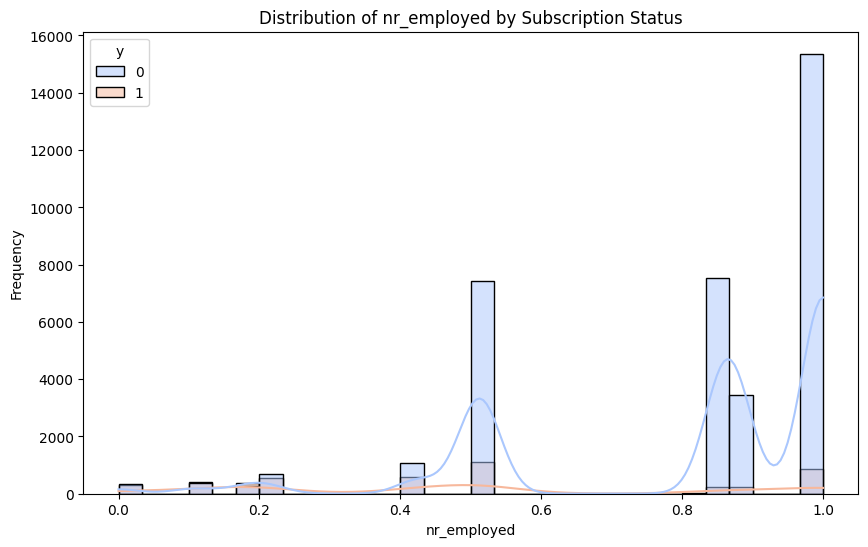

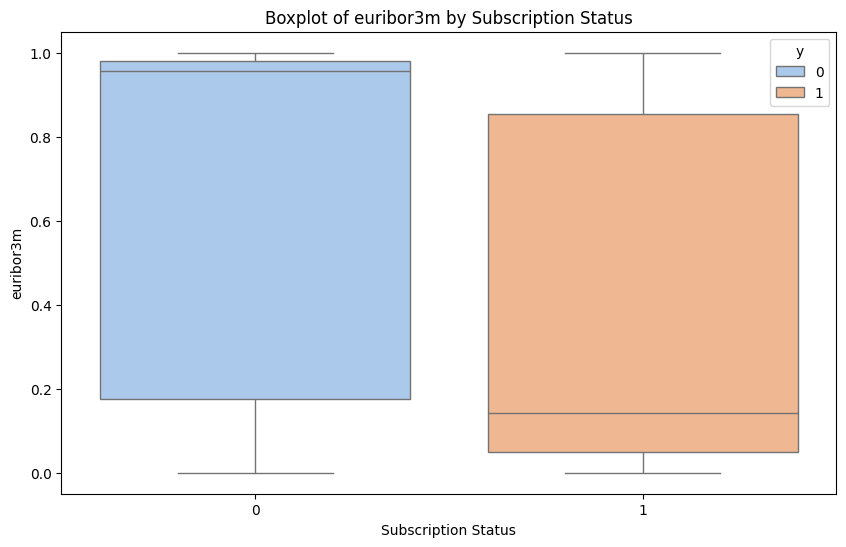

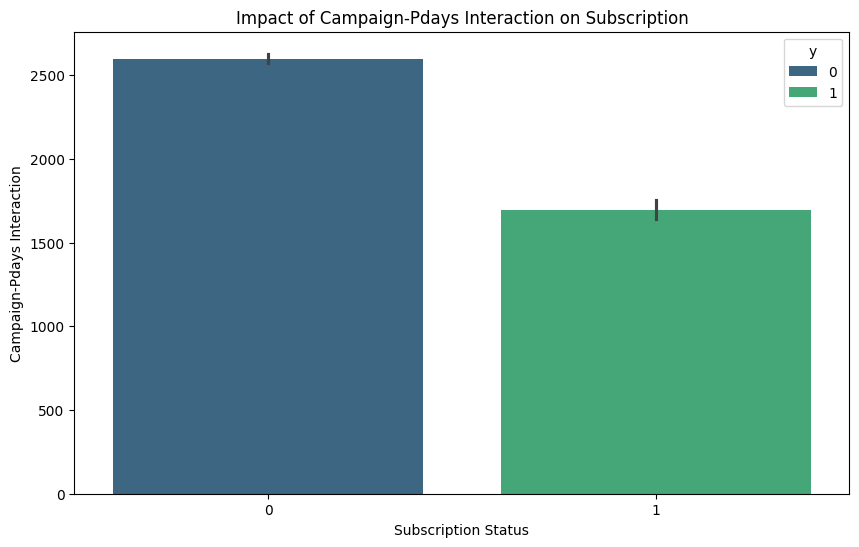

In [ ]:
# Visualizing the impact of the top features on predictions

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y datasets include the top features identified
top_features = [
    'nr_employed', 'euribor3m', 'campaign_pdays_interaction',
    'emp_var_rate', 'cons_conf_idx', 'pdays',
    'pdays_group_More than 10 Days', 'age', 'prev_success_contacts',
    'poutcome_success'
]

# Combine features and target for visualization
X_top = X[top_features]
data_visualization = pd.concat([X_top, y], axis=1)

# Visualization 1: Distribution of 'nr_employed' for both classes
plt.figure(figsize=(10, 6))
sns.histplot(data_visualization, x='nr_employed', hue='y', kde=True, bins=30, palette='coolwarm')
plt.title('Distribution of nr_employed by Subscription Status')
plt.xlabel('nr_employed')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Boxplot for 'euribor3m' across subscription status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_visualization, x='y', y='euribor3m', palette='pastel', hue = 'y')
plt.title('Boxplot of euribor3m by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('euribor3m')
plt.show()

# Visualization 3: Impact of 'campaign_pdays_interaction' on Subscription
plt.figure(figsize=(10, 6))
sns.barplot(data=data_visualization, x='y', y='campaign_pdays_interaction', palette='viridis', hue = 'y')
plt.title('Impact of Campaign-Pdays Interaction on Subscription')
plt.xlabel('Subscription Status')
plt.ylabel('Campaign-Pdays Interaction')
plt.show()


##### Questions